In [248]:
import simplified_env as env
import utils
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import networkx as nx


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [249]:
starting_grid = np.array([1/7,1/7,1/7,1/7,1/7,1/7,1/7])
#starting_grid = np.array([1,0,0,0,0,0,0])

## Environment

In [250]:
environment = env.env(starting_grid=starting_grid)

Environment Ready.


In [251]:
display(environment.probability_matrix)

array([[0.6, 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0.4, 0.2, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0.4],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6]])

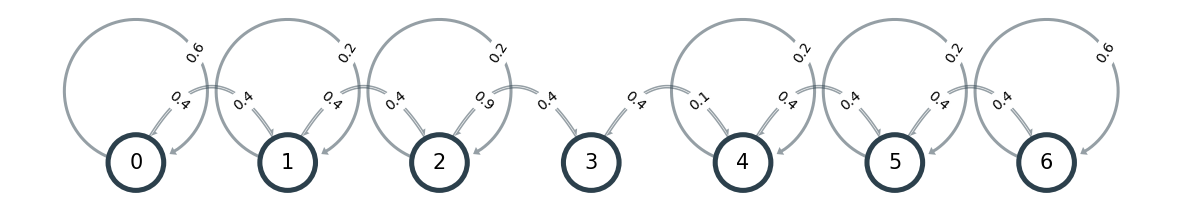

In [252]:
utils.visualize_environment(environment)

## Experiment

In [253]:
old_result = environment.starting_grid
result = np.matmul(environment.starting_grid, environment.probability_matrix)
vmin = 0
vmax = 1

results_series = [old_result,result]


for iter in range(0,200):
    old_result = result
    result = np.matmul(result, environment.probability_matrix)

    results_series.append(result)

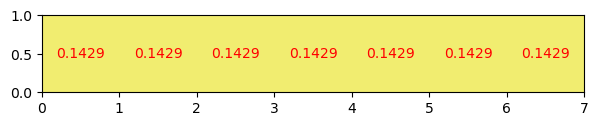

In [254]:
fig, ax = plt.subplots(figsize=(7,1))

log_norm = LogNorm(vmin=vmin, vmax=vmax)


def update(frame):
    cmap = plt.get_cmap('inferno')
    ax.clear()
    result = results_series[frame]

    for i, value in enumerate(result):
        plt.text(i + 0.5, 0.5, f'{value:.4f}', color='red', ha='center', va='center')

    ax.imshow(result.reshape(1, -1), cmap=cmap, aspect='auto', extent=[0, len(result), 0, 1], norm = log_norm)

ani = FuncAnimation(fig, update, frames=len(results_series), interval=500, repeat=False)

HTML(ani.to_jshtml())

In [255]:
print(result)

[0.26470587 0.26470588 0.26470588 0.11764706 0.02941177 0.02941177
 0.02941177]


### Episode Sampling

In [261]:
episode = environment.sample_episode(10)    
print( episode )

[5, 6, 5, 6, 5, 4, 4, 3, 2, 1]


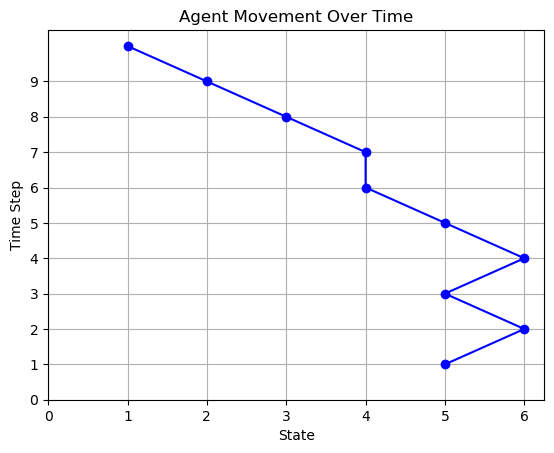

In [262]:
time_steps = range(1, len(episode) + 1)
plt.plot(episode, time_steps, marker='o', linestyle='-', color='b')

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 7, step=1))
plt.yticks(np.arange(0, len(episode), step = 1))
plt.title('Agent Movement Over Time')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

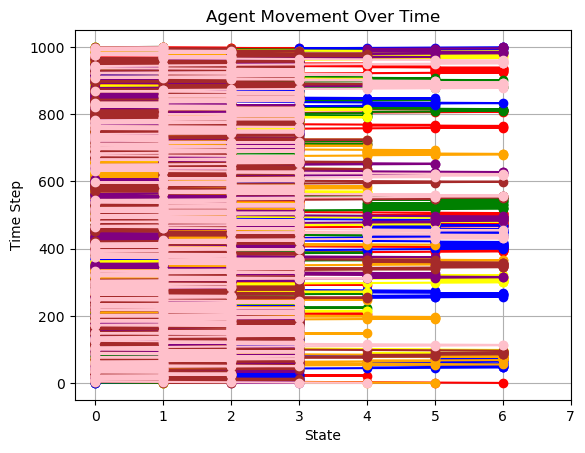

In [267]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(len(colors)):
    episode = environment.sample_episode(1000, random_first_state=True)  
    time_steps = range(1, len(episode) + 1)
    plt.plot(episode, time_steps, marker='o', linestyle='-', color=colors[i])

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 8, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()